In [2]:
import pandas as pd
import re
import numpy as np
import requests
import http.client
from datetime import datetime, timedelta
import ssl
import json
import time
import matplotlib.pyplot as plt


## INE: encuesta sobre el uso del agua en el sector agrario. Serie 2000-2018. Disponibilidad y origen del agua por comunidad autónoma y periodo
### Unidades: miles de metros cúbicos
#### Fuente https://datos.gob.es/es/catalogo/ea0010587-disponibilidad-y-origen-del-agua-por-comunidad-autonoma-y-periodo-identificador-api-t26-p067-p03-serie-l0-02001-px1 

In [485]:
agua = pd.read_csv('../datasets/recursos_hidricos.csv', sep=';')

In [486]:
agua.columns

Index(['Total Nacional', 'Comunidades y Ciudades Autónomas', 'Origen del agua',
       'periodo', 'Total'],
      dtype='object')

In [487]:
agua.head()

,Total Nacional,Comunidades y Ciudades Autónomas,Origen del agua,periodo,Total
0,España,NaN,Total,2018,17.326.575
1,España,NaN,Total,2016,18.409.534
2,España,NaN,Total,2015,18.639.889
3,España,NaN,Total,2014,19.702.748
4,España,NaN,Total,2013,18.319.713


In [488]:
agua.shape

(864, 5)

In [489]:
agua = agua.loc[agua['Origen del agua'] == 'Total'].reset_index(drop=True)

In [490]:
agua.drop(columns='Origen del agua', inplace=True)

In [491]:
agua = agua[agua['Total Nacional'] != 'Resto de Comunidades Autónomas']

In [492]:
agua.loc[:,'Comunidades y Ciudades Autónomas'] = agua.loc[:,'Comunidades y Ciudades Autónomas'].fillna('España')

In [493]:
agua.drop(columns='Total Nacional', inplace=True)

In [494]:
agua = agua.rename(columns={'Comunidades y Ciudades Autónomas': 'Comunidad_Autonoma'})

In [495]:
agua = agua.replace('\.', '', regex=True)

In [496]:
agua.columns.name = None

In [497]:
agua.to_csv('../datasets/uso_recursos_hidricos_ccaa.csv' , index=False)

In [498]:
agua_espana = agua.loc[agua['Comunidad_Autonoma'] == 'España']

In [499]:
agua_espana = agua_espana.rename(columns={'Comunidad_Autonoma': 'Pais'})

In [500]:
agua_espana = agua.loc[agua['Comunidad_Autonoma'] != 'España']

In [501]:
agua_espana.to_csv('uso_recursos_hidricos_espana.csv' , index=False)

In [502]:
agua_andalucia = agua.loc[agua['Comunidad_Autonoma'] == 'Andalucía']

In [503]:
agua_andalucia.to_csv('../datasets/uso_recursos_hidricos_andalucia.csv' , index=False)

In [505]:
agua_andalucia

,Comunidad_Autonoma,periodo,Total
18,Andalucía,2018,4577345
19,Andalucía,2016,4335032
20,Andalucía,2015,4473718
21,Andalucía,2014,4519306
22,Andalucía,2013,3981768
23,Andalucía,2012,3836112
24,Andalucía,2011,4156174
25,Andalucía,2010,4191876
26,Andalucía,2009,4171899
27,Andalucía,2008,3815665


## Escasez: estado histórico
### La escasez mide la disponibilidad de recursos, independientemente de lo que haya llovido. Señala si hay recursos suficientes para atender las demandas. Donde 1 es la ausencia total de escasez; 0 escasez absoluta; 0,5 a 0,3 prealerta; 0,3 a 0,15 alerta y por debajo de 0,15 emergencia.
#### Fuente: https://idechg.chguadalquivir.es/nodo/Redes/escasezhistorico.html subportal de la Confederación Hidrográfica del Guadalquivir (CHG).

In [12]:
escasez = pd.read_csv('../datasets/HistoricoIndicadoresSequiaEscasez.csv')

In [15]:
escasez.head()

,ID_UTE,Fecha,Indicador
0,ES050UTEG,01/01/2019,0.44
1,ES050UTEG,01/02/2019,0.45
2,ES050UTEG,01/03/2019,0.47
3,ES050UTEG,01/04/2019,0.45
4,ES050UTEG,01/05/2019,0.39


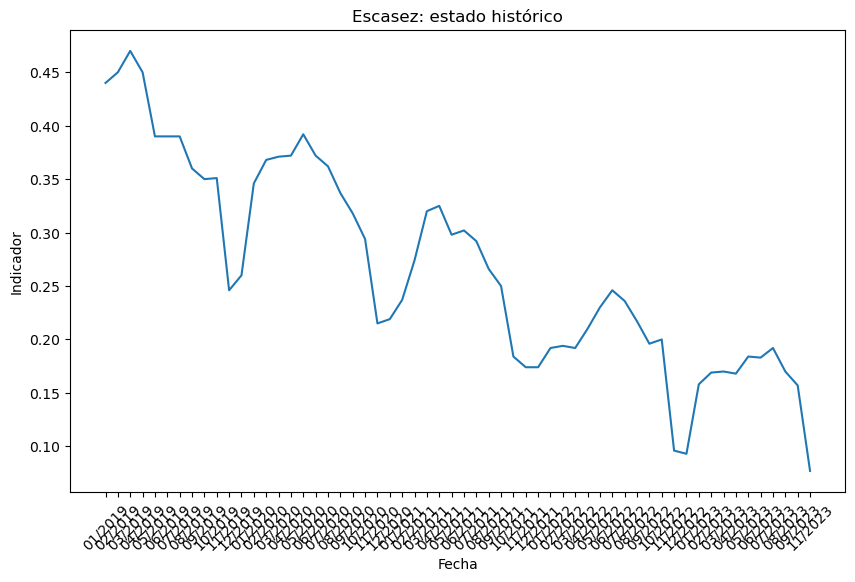

In [23]:

plt.figure(figsize=(10,6))
plt.plot(escasez['Fecha'], escasez['Indicador'])
plt.xlabel('Fecha')
plt.ylabel('Indicador')
plt.title('Escasez: estado histórico')
plt.xticks(rotation=45) 
plt.show()

In [16]:
escasez.drop(columns='ID_UTE', inplace=True)

In [21]:
escasez

,Fecha,Indicador
0,01/2019,0.440
1,02/2019,0.450
2,03/2019,0.470
3,04/2019,0.450
4,05/2019,0.390
5,06/2019,0.390
6,07/2019,0.390
7,08/2019,0.360
8,09/2019,0.350
9,10/2019,0.351


In [20]:
escasez['Fecha'] = escasez['Fecha'].apply(lambda x: x[3:])

In [22]:
escasez.to_csv('../datasets/historico_escasez_guadalquivir.csv' , index=False)